In [1]:
import pandas as pd
import numpy as np


In [2]:
cp=pd.read_csv(r"D:\python files\car_price.csv")

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [4]:
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
cp.isnull().sum()[cp.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
cp=cp.replace({'?':np.nan})
#this will convert all nulls into nulls
#we know how to remove nulls

In [7]:
cp.isnull().sum()[cp.isnull().sum()>0]

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [8]:
cp.normalized_losses.describe() # checked dtypes object 
#i will covery into integer using astype

count     164
unique     51
top       161
freq       11
Name: normalized_losses, dtype: object

In [9]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       203 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [10]:
cp.normalized_losses=cp.normalized_losses.astype('float')
cp.bore=cp.bore.astype('float')
cp.stroke=cp.stroke.astype('float')
cp.horsepower=cp.horsepower.astype('float')
cp.peak_rpm=cp.peak_rpm.astype('float')
cp.price=cp.price.astype('float')

In [11]:
cp.normalized_losses=cp.normalized_losses.fillna(cp.normalized_losses.mean())
cp.bore=cp.bore.replace(cp.bore.mean())
cp.stroke=cp.stroke.fillna(cp.stroke.mean())
cp.horsepower=cp.horsepower.fillna(cp.horsepower.mean())
cp.peak_rpm=cp.peak_rpm.fillna(cp.peak_rpm.mean())
cp.num_of_doors=cp.num_of_doors.fillna('four')


In [12]:
#cp.price not filling null because this out target variable
#we drop there rows(records)
cp=cp.dropna()

In [13]:
cp.isnull().sum()[cp.isnull().sum()>0]

Series([], dtype: int64)

In [14]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   normalized_losses  197 non-null    float64
 2   Fuel_type          197 non-null    object 
 3   make               197 non-null    object 
 4   num_of_doors       197 non-null    object 
 5   aspiration         197 non-null    object 
 6   wheel_base         197 non-null    object 
 7   engine_location    197 non-null    object 
 8   drive_wheels       197 non-null    float64
 9   body_style         197 non-null    object 
 10  length             197 non-null    float64
 11  width              197 non-null    float64
 12  height             197 non-null    float64
 13  curb_weight        197 non-null    int64  
 14  engine_type        197 non-null    object 
 15  num_of_cylinders   197 non-null    object 
 16  engine_size        197 non

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
cp[cp.select_dtypes(include=['object']).columns]=cp[cp.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [17]:
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,1,0,1,0,2,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,4,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,1,0,1,0,2,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,4,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,1,0,1,2,2,0,94.5,0,171.2,65.5,52.4,2823,4,3,152,4,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,0,0,3,1,0,99.8,1,176.6,66.2,54.3,2337,2,2,109,4,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,0,0,3,0,0,99.4,1,176.6,66.4,54.3,2824,2,1,136,4,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [18]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   normalized_losses  197 non-null    float64
 2   Fuel_type          197 non-null    int32  
 3   make               197 non-null    int32  
 4   num_of_doors       197 non-null    int32  
 5   aspiration         197 non-null    int32  
 6   wheel_base         197 non-null    int32  
 7   engine_location    197 non-null    int32  
 8   drive_wheels       197 non-null    float64
 9   body_style         197 non-null    int32  
 10  length             197 non-null    float64
 11  width              197 non-null    float64
 12  height             197 non-null    float64
 13  curb_weight        197 non-null    int64  
 14  engine_type        197 non-null    int32  
 15  num_of_cylinders   197 non-null    int32  
 16  engine_size        197 non

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
cp_train,cp_test=train_test_split(cp,test_size=.2)

In [86]:
#cp=df1

In [87]:
cp_train_x=cp_train.iloc[:,0:-1]
cp_train_y=cp_train.iloc[:,-1]

In [88]:
cp_test_x=cp_test.iloc[:,0:-1]
cp_test_y=cp_test.iloc[:,-1]

In [89]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [90]:
linreg.fit(cp_train_x,cp_train_y)

LinearRegression()

In [91]:
Rsquare=linreg.score(cp_train_x,cp_train_y)
Rsquare

0.9253271987128375

In [92]:
cp_train_x.shape[1]

25

In [93]:
N=cp_train_x.shape[0]
K=cp_train_x.shape[1]

In [94]:
AdjRsquare=1-(1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.9110766641160508

In [95]:
pred_train=linreg.predict(cp_train_x)
pred_test=linreg.predict(cp_test_x)

In [96]:
cp_test_y.shape

(40,)

In [97]:
pred_test.shape

(40,)

In [98]:
err_test=cp_test_y-pred_test
err_test

79      -844.276622
66      4746.952394
97      2250.251729
61       272.653516
83       176.097119
16     17260.077764
150       46.133824
1       -476.042760
155     2806.902735
169    -3055.433915
168    -4346.645173
99     -1861.424188
131      734.470970
102    -4141.443936
187     -578.394721
82     -1982.375192
40      1925.568594
43     -1579.597750
130     -842.288338
176     1293.391196
92      -359.208770
13      2500.166787
185    -1184.031192
140     1012.107118
120     -348.374002
167    -5540.975652
50     -1164.525136
34      -189.149787
133     -793.952439
154     2830.408145
177     1019.424693
142     -179.386231
95      1379.154770
51      -852.645809
127     -247.457093
193     3309.650508
198     2581.478399
147     1486.098095
31       171.575549
197      720.259476
Name: price, dtype: float64

In [99]:
mse=np.mean(np.square(err_test))
mse

11761680.406570526

In [100]:
rmse=np.sqrt(mse)
rmse

3429.530639398127

In [101]:
mape=np.mean(np.abs(err_test*100/cp_test_y))
mape

16.330646870992652

In [102]:
#err_train
err_train=cp_train_y-pred_train
err_train

194   -3189.964533
103   -5525.409165
33     -771.827873
163    2784.843056
143     476.330142
27    -1244.618364
138   -1633.594017
18     4570.898878
151     852.192023
170   -2941.459777
137    1834.915595
7      -643.078305
165     276.212015
139     412.349623
94     1450.493385
172    1869.514956
42     2264.148643
26      331.713345
68     1866.168199
3       353.484016
80     -108.638511
160    1201.420504
157     236.218522
93     1614.325783
114   -1520.234899
32    -1521.237631
119     -39.886648
112   -2383.259654
41     2009.271830
153     586.918413
65     2308.288264
89     -282.384199
21    -1143.210114
171   -1671.900911
67     -694.404260
38     -180.704377
183     -61.673252
64    -1082.476684
49    -3876.430439
85    -1995.489219
15     5036.906414
111   -2677.780125
184     -70.604834
19    -1504.025326
107   -3354.682891
199    3412.557022
28    -3172.920120
195   -2424.712106
53     -429.976561
203    4329.293827
77     -210.810759
30      401.967333
22     -381.

In [103]:
mse=np.mean(np.abs(err_train))
mse

1708.79394700311

In [104]:
rmse=np.sqrt(mse)
rmse

41.33756097066093

In [105]:
mape=np.mean(np.abs(err_train*100/cp_train_y))
mape

13.733276026381011

In [1]:
import matplotlib.pyplot as plt

plt.plot(err_train,'*',color='red');
plt.grid(color='orance')
plt.title('car_price')

NameError: name 'err_train' is not defined

Text(0.5, 1.0, 'car_price')

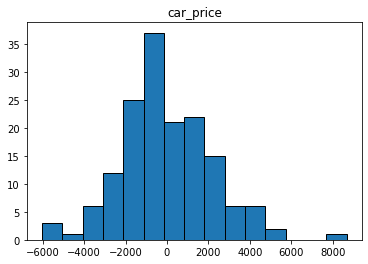

In [107]:
plt.hist(err_train,bins=15,edgecolor='k')
plt.title('car_price')

In [108]:
pred_act_df=pd.DataFrame()
pred_act_df['Actual']=cp_train_y
pred_act_df['Predection']=pred_train


In [109]:
pred_act_df

,Actual,Predection
194,12940.0,16129.964533
103,13499.0,19024.409165
33,6529.0,7300.827873
163,8058.0,5273.156944
143,9960.0,9483.669858
27,8558.0,9802.618364
138,5118.0,6751.594017
18,5151.0,580.101122
151,6338.0,5485.807977
170,11199.0,14140.459777


In [110]:
import seaborn as sns

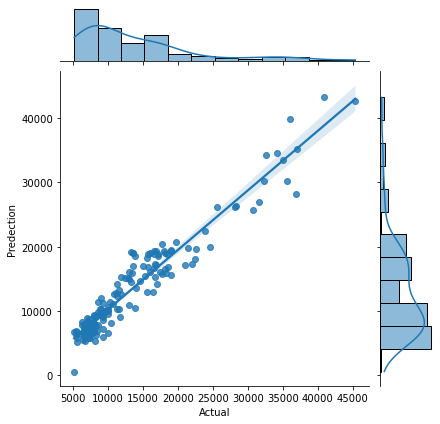

In [111]:
sns.jointplot(x='Actual',y='Predection',data=pred_act_df,kind='reg');
#assumution check homocedacity

In [112]:
def rem_out(df,col,k):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x>mean-k *sd)]
    final_list=[x for x in final_list if (x<mean + k* sd)]
    df1=df.loc[df[col].isin(final_list)];
    print(df1.shape)
    print('numbers of outliers remove==>',df.shape[0]-df1.shape[0])

In [113]:
rem_out(cp,'price',2)

(171, 26)
numbers of outliers remove==> 4
